# Matplotlib 柱状图
Matplotlib 提供了 `bar()` 函数来绘制柱状图，它可以应用在 MATLAB 样式以及面向对象的绘图方法中。当它与 axes 对象一起使用时，其语法格式如下：
```python
ax.bar(x, heigh, width, bottom, align)
```
该函数的参数说明：
- `x`	一个标量序列，代表柱状图的x坐标，默认x取值是每个柱状图所在的中点位置，或者也可以是柱状图左侧边缘位置。
- `height`	一个标量或者是标量序列，代表柱状图的高度。
- `width`	可选参数，标量或类数组，柱状图的默认宽度值为 0.8。
- `bottom`	可选参数，标量或类数组，柱状图的y坐标默认为None。
- `algin`	有两个可选项 {"center","edge"}，默认为 'center'，该参数决定 x 值位于柱状图的位置。
- `label`   这组矩形的 `legend` 标签

该函数的返回值是一个 Matplotlib 容器对象，该对象包含了所有柱状图

## 简单示例

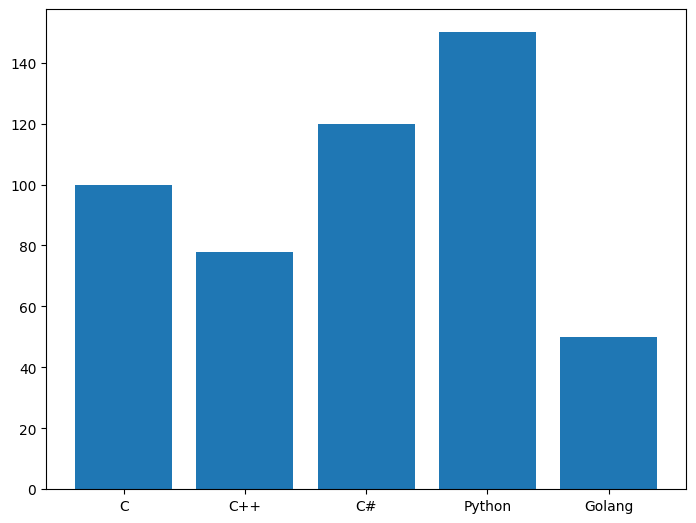

In [1]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])

langs = ['C', 'C++', 'C#', 'Python', 'Golang']
students = [100, 78, 120, 150, 50]

ax.bar(langs, students)
plt.show()

## 多组柱状图
通过调整柱状图的宽度，可以实现在同一 x 轴位置绘制多个柱状图。

可以将它们设置成不同的颜色，从而使它们更容易区分：

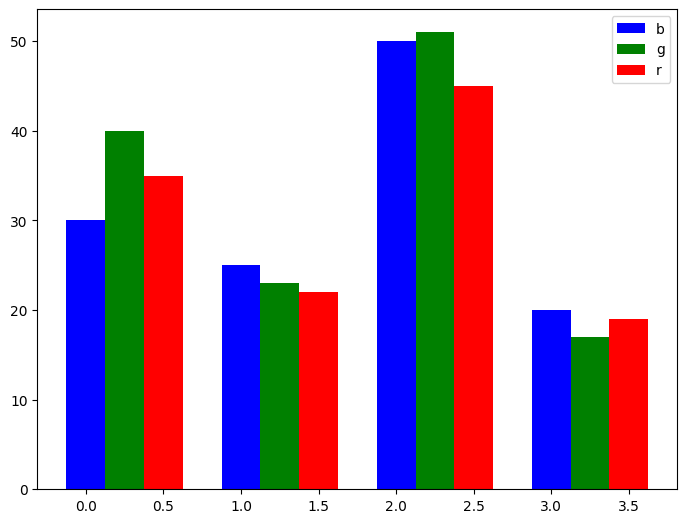

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# 数据
data = [
    [30, 25, 50, 20],
    [40, 23, 51, 17],
    [35, 22, 45, 19]
]
x = np.arange(4)
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])

# bar 函数是根据给定的 x 信息，以这个位置为矩形的中点来绘制指定高度的矩形
# 所以，只要把 x 的位置平移，就可以绘制另一个矩形
ax.bar(x + 0.00, data[0], color='b', width=0.25)
ax.bar(x + 0.25, data[1], color='g', width=0.25)
ax.bar(x + 0.50, data[2], color='r', width=0.25)
ax.legend(labels=('b', 'g', 'r'))

plt.show()

## 堆叠柱状图
将不同数组别的柱状图堆叠在一起，堆叠后的柱状图高度显示了两者相加的结果值。

`bar()` 函数提供了一个可选参数 `bottom`，该参数可以指定柱状图开始堆叠的起始值，一般从底部柱状图的最大值开始，依次类推：

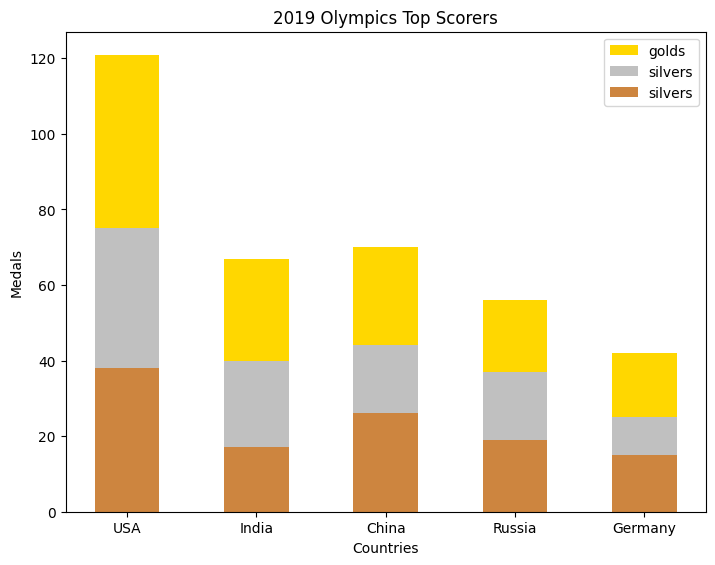

In [8]:
import numpy as np
import matplotlib.pyplot as plt

countries = ['USA', 'India', 'China', 'Russia', 'Germany'] 
bronzes = np.array([38, 17, 26, 19, 15]) 
silvers = np.array([37, 23, 18, 18, 10]) 
golds = np.array([46, 27, 26, 19, 17]) 

index = [x for x, _ in enumerate(countries)]

fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])

ax.bar(index, golds, width=0.5, label='golds', color='gold',
        bottom=silvers+bronzes)
ax.bar(index, silvers, width=0.5, label='silvers', color='silver',
        bottom=bronzes)
ax.bar(index, bronzes, width=0.5, label='silvers', color='#CD853F')


ax.set_xticks(index, countries)
ax.set_ylabel("Medals")
ax.set_xlabel("Countries")
ax.legend(loc="upper right")
ax.set_title("2019 Olympics Top Scorers")
plt.show()

## 添加柱状图数据标签
使用 `ax.text()` 给柱状图增加数据标签，函数主要参数：
- `x`：待添加标签的 x 坐标位置；
- `y`：待添加标签的 y 坐标位置；
- `s`：添加的内容
- `fontsize`：字体大小

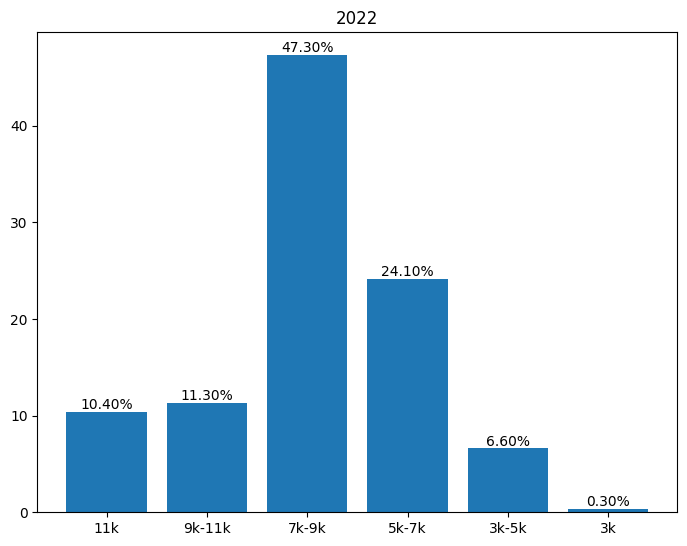

In [13]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array(["11k", "9k-11k", "7k-9k", "5k-7k", "3k-5k", "3k"])
y = np.array([10.4, 11.30, 47.30, 24.10, 6.60, 0.30])

fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])

ax.set_title("2022")
ax.bar(x, y)

# 使用 text 增加标签，只能一个一个加
for a, b in zip(x, y):
    # 取出 a 是每一个矩形的 x 坐标，b 就是其高度，在这个位置添加 '%.2f%%' % b 格式化字符串
    ax.text(a, b, '%.2f%%' % b, ha='center', va='bottom', fontsize=10)  # 添加数据标签
plt.show()

## 横向绘制
使用 `barh()` 函数横向绘制矩形，用法与 `bar()` 一致

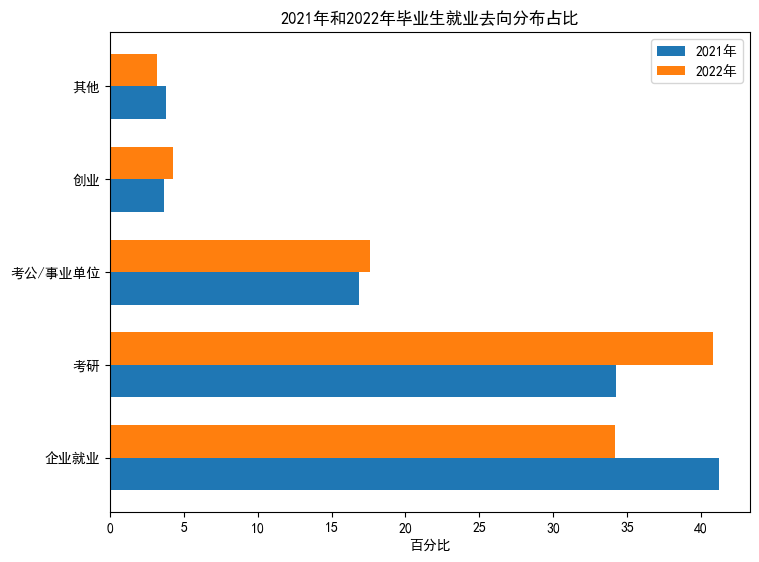

In [15]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["font.sans-serif"]=["SimHei"] #设置字体
plt.rcParams["axes.unicode_minus"]=False 

data2021 = [41.25, 34.27, 16.84, 3.67, 3.80] 
data2022 = [34.21, 40.78, 17.57, 4.25, 3.19] 

subjects = ['企业就业', '考研', '考公/事业单位','创业', '其他']
ylabel = ['0.00%', '5.00%', '10.00%', '15.00%', '20.00%', '25.00%', '30.00%', '35.00%', '40.00%']
 
x = np.arange(len(subjects))  # the label locations
width = 0.35  # the width of the bars
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])

# 绘制两组，也是同样使用 x 的偏移，只是纵向的是 x 轴
rects1 = ax.barh(x - width/2, data2021, width, label='2021年')
rects2 = ax.barh(x + width/2, data2022, width, label='2022年')
 
ax.set_title('2021年和2022年毕业生就业去向分布占比')
ax.set_yticks(x, subjects)
ax.set_xlabel('百分比')
ax.legend()
 
plt.show()

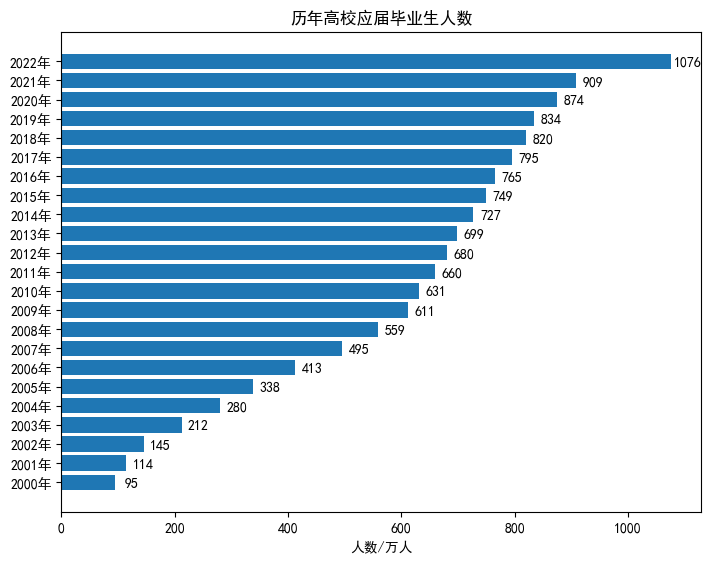

In [38]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["font.sans-serif"]=["SimHei"] #设置字体
plt.rcParams["axes.unicode_minus"]=False 

fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])

x = np.array([ i for i in range(2000, 2023)])
y = np.array([95, 114, 145, 212, 280, 338, 413, 495, 559, 611, 631, 660, 680, 699, 727, 749, 765, 795, 820, 834, 874, 909, 1076])

for a, b in zip(x, y):
    ax.text(b + 30, a - 0.35, '%d' % b, ha='center', va='bottom', fontsize=10)

ax.barh(x, y)
ax.set_yticks(x, ['{}年'.format(i) for i in x])
ax.set_title('历年高校应届毕业生人数')
# x, y 轴的位置还是没有变化的
ax.set_xlabel('人数/万人')

plt.show()

## 三维柱状图

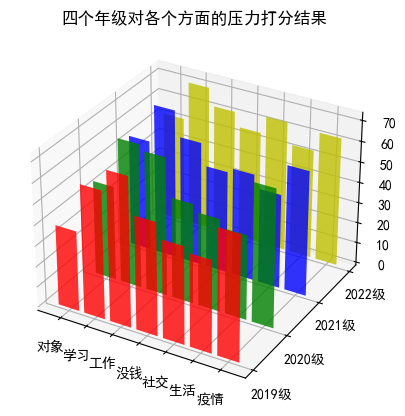

In [39]:
fig = plt.figure()
ax  = fig.add_subplot(projection='3d')

ens    = ['对象', '学习', '工作', '没钱', '社交', '生活', '疫情']
colors = ['r', 'g', 'b', 'y']
stas   = [ '2019级', '2020级', '2021级', '2022级']
weight = { '2019级': np.array([38.95, 62.03, 72.25, 54.75, 47.33, 44.8, 60.68]),
           '2020级': np.array([45.8, 69.75, 67.03, 48.62, 45.18, 41.23, 66.86]),
           '2021级': np.array([54.09, 72.35, 60.21, 49.63, 52, 45.8, 60.79]),
           '2022级': np.array([51.9, 70.45, 62.03, 55.1, 63.69, 53.31, 62.62])}


for ith,ista in enumerate(stas):
    xs = np.arange(len(ens))
    ys = weight[ista]

    cs = [ colors[ith] ] * len(xs)
    # Plot the bar graph given by xs and ys on the plane y=k with 80% opacity.
    ax.bar(xs, ys, zs=ith, zdir='y', color=cs, alpha=0.8)

ax.set_xticks([ i for i in range(len(ens)) ])
ax.set_xticklabels(ens)  
ax.set_yticks([ i for i in range(len(stas)) ])
ax.set_yticklabels(stas)  

plt.title('四个年级对各个方面的压力打分结果')
plt.show()